# Intro

Symmetry Guidance $SG(\theta) = |\sum\limits_{S\in H}S^{\dagger}U^{\dagger}(\theta)OU(\theta)S - U^{\dagger}(\theta)OU(\theta)|$, where H is the symmetry freegroup the data holds.

This is a term that independent of training set, which is different to loss functions.

What would happen if we use PO instead O directly?
   1. every circuit would have a corresponding new circuit
   2. but would they have the same output? No, as shown [below](#in-of-po-on-circuit-outputs), outputs of twirled circuits are hard to say.


Then:
1. Once the quantum circuit is determined, we could calculate the symmetry guidance term to ?
2. We could use this as a guidance term to train on some tasks.

# Structure

Below, we choosing the two-qubits cat problem using simple circuit $CNOT^{(cos^2(\theta))}$ to show some effect of symmetry guidance term.

Following, we would calculate the circuit form $U(\theta)$ started from the decomposition of CNOT gate.

Then, the O_tilde form -> P(O) form -> SG function plot

# CNOT eigen-decoposition

In [1]:
%matplotlib inline
import numpy as np

# 定义CNOT门矩阵
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])

# 计算CNOT门的本征值和本征向量
eigenvalues, eigenvectors = np.linalg.eig(CNOT)

# 输出本征值和本征向量
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# 计算P和D矩阵
P = eigenvectors
D = np.diag(eigenvalues)
P_inv = np.linalg.inv(P)


# 输出P和D矩阵
print("P matrix:\n", P)
print("D matrix:\n", D)
print("P_inv matrix:\n", P_inv)

Eigenvalues:
 [ 1. -1.  1.  1.]
Eigenvectors:
 [[ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]
 [ 0.70710678 -0.70710678  0.          0.        ]
 [ 0.70710678  0.70710678  0.          0.        ]]
P matrix:
 [[ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]
 [ 0.70710678 -0.70710678  0.          0.        ]
 [ 0.70710678  0.70710678  0.          0.        ]]
D matrix:
 [[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
P_inv matrix:
 [[ 0.          0.          0.70710678  0.70710678]
 [ 0.          0.         -0.70710678  0.70710678]
 [ 1.          0.          0.          0.        ]
 [ 0.          1.          0.          0.        ]]


# Circuit Form U(θ)

In [2]:
import sympy as sp

# 定义符号变量
theta = sp.Symbol('theta', real=True)

# 定义矩阵D
D = sp.diag(1, sp.exp(sp.I*sp.pi*sp.cos(theta)**2), 1, 1)

U = P * D * P_inv

U

Matrix([
[1.0,   0,                                 0,                                 0],
[  0, 1.0,                                 0,                                 0],
[  0,   0, 0.5*exp(I*pi*cos(theta)**2) + 0.5, 0.5 - 0.5*exp(I*pi*cos(theta)**2)],
[  0,   0, 0.5 - 0.5*exp(I*pi*cos(theta)**2), 0.5*exp(I*pi*cos(theta)**2) + 0.5]])

As the Z msmt result of input 00 and 11 are related to the front two columns of the matrix, we could easily found outputs of them are 1 and -1, respectively. Both of them are independent of θ.

In [3]:
from sympy import sqrt, symbols, pi, cos, Matrix, latex, trace
from IPython.display import display, Math

sp.eye(2)

Matrix([
[1, 0],
[0, 1]])

# O_tilde

In [4]:
from sympy import tensorproduct

II = np.eye(2)
Z = np.array([[1, 0], [0, -1]])
Ob = np.kron(II, Z)

print("Observable matrix:")
print(Ob)

# 计算U(a)^\dagger O U(a)
U_dagger = U.H
O_tilde = U_dagger @ Ob @ U
O_tilde.simplify()

print("U:")
display(Math(latex(U)))
print("U(a)^\dagger:")
display(Math(latex(U_dagger)))
# print("U(a)^\dagger @ Ob:")
# display(Math(latex(U_dagger@Ob)))
print("O_tilde:")
display(Math(latex(O_tilde)))

Observable matrix:
[[ 1.  0.  0.  0.]
 [ 0. -1.  0. -0.]
 [ 0.  0.  1.  0.]
 [ 0. -0.  0. -1.]]
U:


<IPython.core.display.Math object>

U(a)^\dagger:


<IPython.core.display.Math object>

O_tilde:


<IPython.core.display.Math object>

# PO and SG

In [5]:
SWAP = Matrix([[1, 0, 0, 0],
               [0, 0, 1, 0],
               [0, 1, 0, 0],
               [0, 0, 0, 1]])

S_dagger = SWAP.T  # SWAP 门是自它的转置的逆，因此 S^† = S^T
PO1 = S_dagger @ O_tilde @ SWAP
PO1.simplify()
print("PO1 matrix:")
display(Math(latex(PO1)))

II = Matrix([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, 1]])
PO2 = II @ O_tilde @ II
PO2.simplify()
print("PO2 matrix:")
display(Math(latex(PO2)))

PO = 1/2 * (PO1 + PO2)

print("PO matrix:")
display(Math(latex(PO)))

# 计算 PO 和 O_tilde 之间的差
diff_matrix = PO - O_tilde

# 计算 H-S norm
# HS_norm = sqrt(sum([abs(elem)**2 for elem in diff_matrix]))
# HS_norm = sqrt(trace(diff_matrix.H * diff_matrix))
HS_norm = trace(diff_matrix.H * diff_matrix)

# 简化表达式
HS_norm = HS_norm.simplify()

print("HS_norm:")
display(Math(latex(HS_norm)))

PO1 matrix:


<IPython.core.display.Math object>

PO2 matrix:


<IPython.core.display.Math object>

PO matrix:


<IPython.core.display.Math object>

HS_norm:


<IPython.core.display.Math object>

<a id="InofPO"></a>
# In of PO on circuit outputs

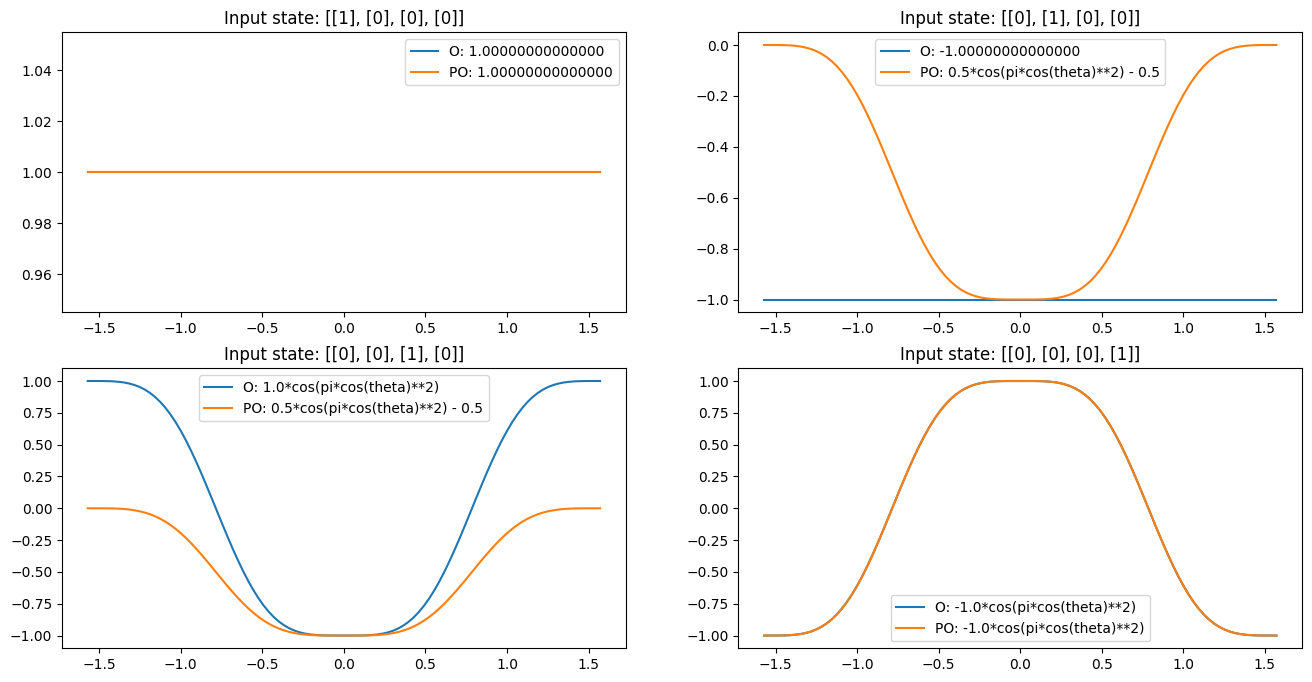

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(16, 8))

for i in range(4):

    test_input = Matrix([[0], [0], [0], [0]])
    test_input[i] = 1

    test_rho = test_input @ test_input.H

    pred_O = trace(O_tilde * test_rho)
    pred_PO = trace(PO * test_rho)

    if pred_O.is_constant():
        def pred_O_func(_):
            return pred_O
    else:
        pred_O_func = sp.lambdify(theta, pred_O, "numpy")

    if pred_PO.is_constant():
        def pred_PO_func(_):
            return pred_PO
    else:
        pred_PO_func = sp.lambdify(theta, pred_PO, "numpy")

    theta_values = np.linspace(-np.pi/2, np.pi/2, 100) 
    preds_O = np.array([pred_O_func(t) for t in theta_values])
    preds_PO = np.array([pred_PO_func(t) for t in theta_values])

    axs[i//2, i%2].set_title(f"Input state: {test_input.tolist()}")
    axs[i//2, i%2].plot(theta_values, preds_O, label=f'O: {pred_O}')
    axs[i//2, i%2].plot(theta_values, preds_PO, label=f'PO: {pred_PO}')
    axs[i//2, i%2].legend()


we could see that, for all kinds of possible circuit parameter settings, twirling operation would make the prediction better or worse or keeps.

Then its hard to tell what would twirling do to the circuit.

# SG Plot

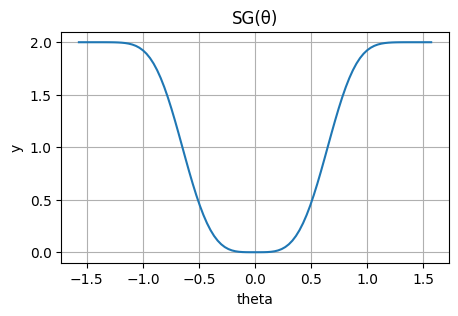

In [7]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

y = sp.lambdify(theta, HS_norm, 'numpy')
theta_values = np.linspace(-np.pi/2, np.pi/2, 100)  # 在区间 [-2, 2] 内创建 1000 个等间距的点
y = y(theta_values)

fig = plt.figure(figsize=(5, 3))  # 设置图像大小
plt.plot(theta_values, y)  # 绘制函数图像
plt.xlabel('theta')  # 设置 x 轴标签
plt.ylabel('y')  # 设置 y 轴标签
plt.title('SG(θ)')  # 设置标题
plt.grid()  # 显示网格线

# when choosing other input paris

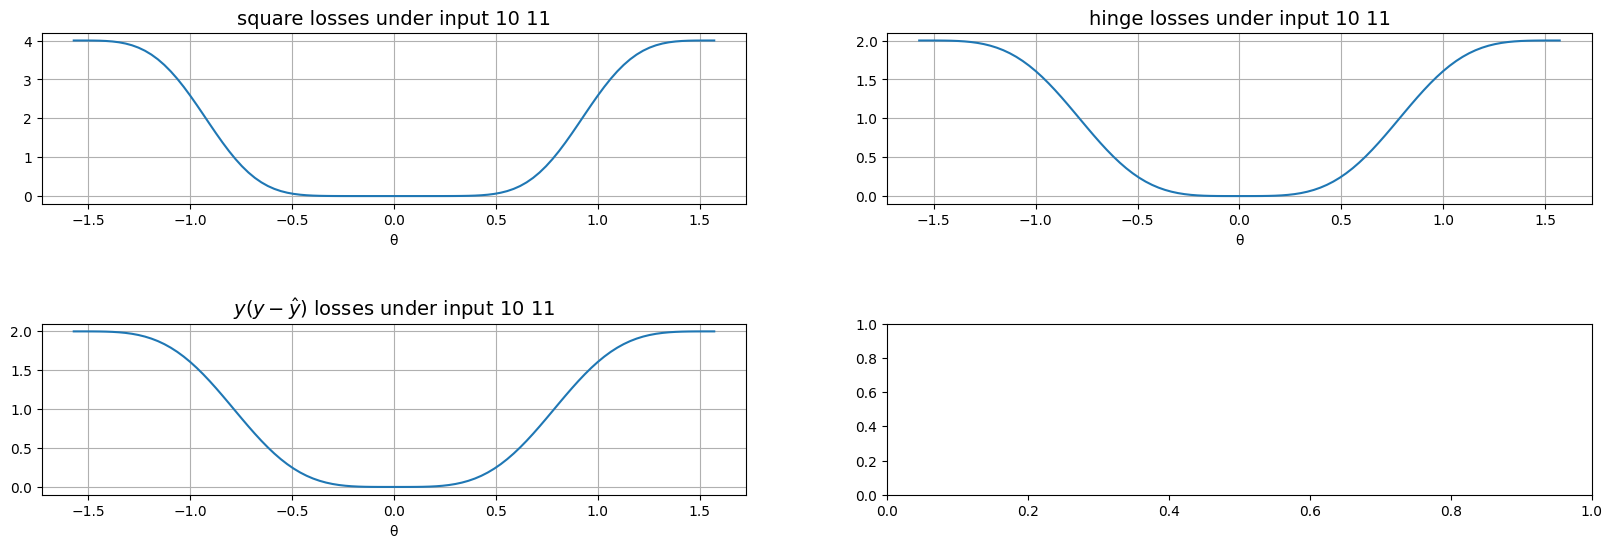

In [8]:
x = np.linspace(-np.pi/2, np.pi/2, 100)  # 在区间 [-2, 2] 内创建 1000 个等间距的点

fig, axs = plt.subplots(2, 2, figsize=(20, 6))

y_square = (1+np.cos(np.pi*np.cos(x)**2))**2
axs[0, 0].plot(x, y_square)
axs[0, 0].set_title('square losses under input 10 11', fontsize=14)
axs[0, 0].set_xlabel('θ')
axs[0, 0].grid()

y_hinge = np.maximum(0, 1+np.cos(np.pi*np.cos(x)**2))
axs[0, 1].plot(x, y_hinge)
axs[0, 1].set_title('hinge losses under input 10 11', fontsize=14)
axs[0, 1].set_xlabel('θ')
axs[0, 1].grid()

y_lmd = 1+np.cos(np.pi*np.cos(x)**2)
axs[1, 0].plot(x, y_lmd)
axs[1, 0].set_title(r'$y(y - \hat{y})$ losses under input 10 11', fontsize=14)
axs[1, 0].set_xlabel('θ')
axs[1, 0].grid()

# 调整子图之间的间距
plt.subplots_adjust(hspace=0.7)

plt.show()  # 显示图像

The Z measurement of a given input is related to the elements of the column it relates to, the output value would be calculated by:

$y = \sum U_{i_{even}}^2 - \sum U_{i_{odd}}^2$,

for example, when input 00, the output would be $U_{00}^2 + U_{10}^2 - U_{01}^2 - U_{11}^2$

We could see that:

    1. Outputs of 00 and 01 are independent of θ, they would always output the same value
    2. 00 -> 1, 01 -> -1
    3. to replicate the full IO table, we need to set y<0 -> -1 -> cat
    4. could we use this to train the model?

Then above circuit could only be trained on data 10 and 11, after some calculation, we could they output $\pm \cos(\pi \cos^2(\theta))$, respectively.

    1. They have just opposite output values.
    2. In above three loss functions, they always show the same loss curve.
    3. When we choosing y<0 -> -1 -> cat strategy, as plotted above, training would lead to $\theta=0$ => the circuit is CNOT. In this case, we could restore the full IO table.
    4. When choosing y>0 -> 1 -> cat strategy, above losses would add a negative sign in front of the cos part => circuit is Idenity. In this case, we could not restore the full IO table since predictions on 00 and 01 are wrong.

When we combine them, due to the "same curve" and "constant value" px2 showed above, we only need to consider one case. For example, 00 and 10:

    1. training on one of the 10 and 11 part, we would get the same result as shown above.
    2. adding a constant value won't change the optimal point.
    3. then this case is the same as the second one.

# Summary

## SG
    1. SG term is independent of the training set, then it would not be influenced by the bias brought by training set. It simply brings a restriction on the parameters of the model. (So there might be other ways to use this term like twirling parameters after each training step?)
    2. In this case, we could train the model by simply using the SG term, and this is able to replicate the full IO table.

## w/o SG (bias possible?)
As for using general loss functions, they might be biased by the training set, but this depends:

    1. Lots of factors might influence the loss form then final result: training set, loss function, label strategy, etc.
    2. Some combinations of them could restore the full IO table, some not.
    3. Means that the appearance of over-fitting depends on lost of factors, not only the loss function. And it seems that when the task is too simple, each factor might show a huge influence on the final result. So it might be better to use some more complicated tasks, but another new problem would come that the SG term might also be not that important.